# Image classification using Tensorflow and CNN

### Task

We have a dataset for the numbers shown via sign language, numbers are from 0 to 5. We want to train our CNN so that it detects the sign shown at the picture.

In [1]:
# importing libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

## Loading data

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


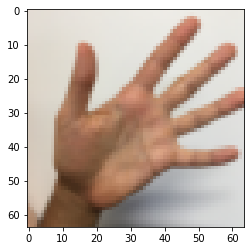

In [4]:
# example of a picture
index = 29
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [5]:
# normalizing colour values
X_train = X_train_orig/255.
X_test = X_test_orig/255.
# converting training and test labels to one hot matrices
Y_train = Y_train_orig
Y_test = Y_test_orig

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 64
number of test examples = 64
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1, 1080)
X_test shape: (120, 64, 64, 3)
Y_test shape: (1, 120)


## CNN architecture

The layers are the following: CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
Input images are all 64x64x3

For each layer the following parameters are used:
 - Conv2D: stride 1, padding is "SAME"
 - ReLU
 - Max pool: 8 by 8 filter, 8 by 8 stride, padding is "SAME"
 - Conv2D: stride 1, padding is "SAME"
 - ReLU
 - Max pool: 4 by 4 filter, 4 by 4 stride, padding is "SAME"
 - Flatten
 - FULLYCONNECTED (FC) layer with softmax

In [7]:
# defining the model
model = keras.Sequential([
    keras.layers.Conv2D(strides=1, filters=8, kernel_size=4, padding='same', activation='relu', input_shape=(64, 64, 3), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.MaxPool2D(pool_size=8, strides=8, padding='same'),
    keras.layers.Conv2D(strides=1, filters=16, kernel_size=2, padding='same', activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.MaxPool2D(pool_size=4, strides=4, padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(6, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# training the model
model.fit(X_train, Y_train.T, batch_size=64, epochs=100)

Train on 1080 samples
Epoch 1/100
1080/1080 [==============================] - 6s 5ms/sample - loss: 1.9603 - acc: 0.1509
Epoch 2/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.9228 - acc: 0.1815
Epoch 3/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.9074 - acc: 0.1935
Epoch 4/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8936 - acc: 0.1824
Epoch 5/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8809 - acc: 0.2065
Epoch 6/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8704 - acc: 0.2065
Epoch 7/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8612 - acc: 0.2676
Epoch 8/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8508 - acc: 0.2556
Epoch 9/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8438 - acc: 0.2759
Epoch 10/100
1080/1080 [==============================] - 2s 2ms/sample - loss

Epoch 82/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9224 - acc: 0.7639
Epoch 83/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9191 - acc: 0.7648
Epoch 84/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9165 - acc: 0.7519
Epoch 85/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9100 - acc: 0.7704
Epoch 86/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9050 - acc: 0.7806
Epoch 87/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9015 - acc: 0.7769
Epoch 88/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9046 - acc: 0.7731
Epoch 89/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.8991 - acc: 0.7769
Epoch 90/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.9001 - acc: 0.7750
Epoch 91/100
1080/1080 [==============================] - 2s 2ms/sample - loss: 0.8911 - ac

## Evaluating performance

In [10]:
test_loss, test_acc = model.evaluate(X_test,  Y_test.T, verbose=2)
print("Loss on test data: %f, accuracy: %f" % (test_loss, test_acc))

120/120 - 0s - loss: 0.9355 - acc: 0.7417
Loss on test data: 0.935526, accuracy: 0.741667


The performance on the test and training set are quite similar, thus, the regularization does really matter

Changing the hyperparams might help to increase the performance

## Visualizing the images the model makes mistakes in

In [11]:
# make predictions
predictions = model.predict(X_test)

[0.00456712 0.12074015 0.35829914 0.21953863 0.05285608 0.24399893]
true label:  [3]


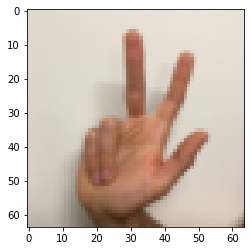

In [12]:
for i in range(predictions.shape[0]):
    if np.argmax(predictions[i]) != Y_test[:, i]:
        plt.imshow(X_test[i])
        print(predictions[i])
        print("true label: ", Y_test[:, i])
        break